# GPU Hardware Accelerator
To vastly speed up processing, we can use the Google Colab GPU. However, we must enable the GPU in each newly created notebook:
1.	click Runtime in the top left menu
2.	click Change runtime type from the drop-down menu
3.	choose GPU from the Hardware accelerator drop-down menu
4.	click SAVE

The free GPU has usage limits. Consult the following URL to find out more: https://research.google.com/colaboratory/faq.html#resource-limits


Test if GPU is active:

In [2]:
import tensorflow as tf

# display tf version and test if GPU is active
tf.__version__, tf.test.gpu_device_name()

('2.3.0', '/device:GPU:0')

# Tensors in the **load_digits** Dataset

Let's explore tensors in context with the **load_digits** dataset. The dataset is part of the Scikit-Learn library, which is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms that are easy to use and manipulate.

The load_digits dataset consists of 1797 8x8 images. Each image represents a hand-written digit from 0-9. Image data is contained in the **images** container. The dataset also contains the data flattened into feature vectors of length 64 in the **data** container. The length of 64 is obtained by multiplying the 8X8 image pixels. That is, each image is represented by 8 rows and 8 columns of pixels. So, the flattened data set consists of 1797 flattened vectors of 64 elements. Target values are contained in the **target** container and target names are contained in the **target_names** container. Finally, the **DESCR** holds descriptions of the dataset.

The data container of flattened vectors is included to allow us to more easily use Scikit-Learn machine learning algorithms. The image container is included so that we can visualize digits.

Now, let's get the data and explore:

In [3]:
import tensorflow as tf
from sklearn.datasets import load_digits

# get data

digits = load_digits()

# get available containers (or keys) from dataset

br = '\n' # create a newline variable

print (digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [4]:
# create variables

data = digits.data
images = digits.images
targets = digits.target
target_names = digits.target_names

In [5]:
# display tensor information

print ('data container:')
print (str(data.ndim) + 'D tensor')
print (data.shape)
print (data.dtype, br)

print ('image container:')
print (str(images.ndim) + 'D tensor')
print (images.shape)
print (images.dtype, br)

print ('targets container:')
print (str(targets.ndim) + 'D tensor')
print (targets.shape)
print (targets.dtype, br)

print ('target names container:')
print (target_names)

data container:
2D tensor
(1797, 64)
float64 

image container:
3D tensor
(1797, 8, 8)
float64 

targets container:
1D tensor
(1797,)
int64 

target names container:
[0 1 2 3 4 5 6 7 8 9]


So, flattened data is a 2D tensor consisting of 1797 vectors each with 64 float64 elements. Image data is a 3D tensor consisting of 1797 float64 8x8 pixel image matrices. Target data is a 1D tensor with 1797 int64 target values that correspond to each data element. As you can see, target_names range from 0 to 9.

Let's look at the 1st data element and visualize the digit between 0 and 9 that it represents:

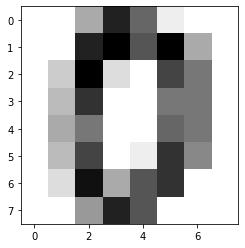

In [6]:
# first image begins at index 0

image = images[0]
import matplotlib.pyplot as plt
plt.imshow(image, cmap='binary')
plt.show()

In [7]:
# first digit begins at index 0

target = targets[0]
print ('digit is:', target, br)

# image matrix of first image

print ('image matrix:', br)
print (image)

digit is: 0 

image matrix: 

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


# Image Matrix

1. The numbers in the matrix we just displayed reprent grayscale intensity
2. So, every '0' represents **white** space
3. And, higher numbers represent darker shades of **gray** to **black**

That is, the lower the number, the lighter the gray (with zero being white). The higher the number, the darker the shade of gray (with high numbers approaching black). So, you can kind of see the digit 0 by looking at the numbers in the matrix.

# Split into Train-Test Data

We can use the **images** data directly or reshape the flattened **data**. Let's start by reshaping the flattened data. This is a good exercise because you may have to reshape a dataset in the future.

For machine learning and deep learning applications, we split data into a training set and testing set. The **training** set contains a known output and the model learns on this data in order to be generalized to other data later on. The **test** dataset is used to test our model's prediction.

The **train_test_split** module is part of the Scikit-Learn library. It allows us to efficiently split arrays or matrices into random train and test subsets. With the *test_size* parameter, we can set the size of the training and test sets. In the case below, the test subset is 33% and the training subset is 67% of the larger dataset. The *random_state* parameter is set to stabilize results. If not set, results can vary widely with each run of our training algorithm. 

In [8]:
# Input image dimensions

img_rows, img_cols = 8, 8

In [9]:
# Reshape
X = data.reshape(data.shape[0], img_rows, img_cols)
print ('X reshaped:', X.shape)
print ('number of dimensions:', X.ndim)

X reshaped: (1797, 8, 8)
number of dimensions: 3


In [10]:
y = targets
y.shape

(1797,)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=0)

Alternatively, we can use the images directly because it is already in matrix form.

In [13]:
X_alt = images
y_alt = targets

print ('X:', X_alt.shape)
print ('number of dimensions:', X_alt.ndim, br)

X_tra, X_tes, y_tra, y_tes = train_test_split(
    X_alt, y_alt, test_size=0.33, random_state=0)

print ('X_train:', X_tra.shape)
print ('number of dimensions:', X_tra.ndim)
train_percent = X_tra.shape[0] / X_alt.shape[0]
print ('train data percent of X data:', train_percent, br)

print ('X_test:', X_tes.shape)
print ('number of dimensions:', X_tes.ndim)
test_percent = X_tes.shape[0] / X_alt.shape[0]
print ('test data percent of X data:', test_percent, br)

num_images = X_tra.shape[0] + X_tes.shape[0]
print ('total number of images:', num_images)

X: (1797, 8, 8)
number of dimensions: 3 

X_train: (1203, 8, 8)
number of dimensions: 3
train data percent of X data: 0.669449081803005 

X_test: (594, 8, 8)
number of dimensions: 3
test data percent of X data: 0.330550918196995 

total number of images: 1797


We know that the train_test_split() worked as expected because the training set (X_train) contains 1203 images (two-thirds of X data) while the test set (X_test) contains 594 images (one-third of X data).

# Load NumPy arrays with tf.data.Dataset

Let's build our first neural network with TensorFlow 2.x. Assuming you have an array of examples and a corresponding array of labels, pass the two arrays as a tuple into **tf.data.Dataset.from_tensor_slices** to create a **tf.data.Dataset**.

## Build the Input Pipeline

* ensure that feature data is float32 or float 64
* ensure that target data is int32 or int64
* normalize data
* create a dataset whose elements are slices of the given tensors
* notice that train and test tensors are composed of both images AND labels

When training a neural network, it is most common to use either 32-bit precision data. However, 64-bit precision data can also be used.In our case, training data is already 64-bit (float64) precision so we don't have to convert it. Target data should be either int32 or int64. In our case, it is int64.

To scale the data, we divide each image by 255. Data values (image pixels) are often stored as integer numbers in the range from 0 to 255, which is the range that a single 8-bit byte can hold. So, this division ensures that input features are scaled between 0.0 and 1.0. Scaling reduces erratic behavior of our neural network during training.

To create the data objects that tensorflow requires, we need to take slices from the training and test tensors. The **tf.data.Dataset.from_tensor_slices** method takes slices from the given tensors in the form of tensorflow objects. That is, the method creates a dataset whose elements are slices of the given tensors.

In [15]:
# TensorFlow expects feature data as float and label as int

X_train.dtype, y_train.dtype

(dtype('float64'), dtype('int64'))

In [20]:
# scale by dividing by the number of pixels in an image

s_train = X_train / 255.0

s_test = X_test / 255.0

In [25]:
# create tensors for TensorFlow consumption

train_dataset = tf.data.Dataset.from_tensor_slices((s_train,
                                                    y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((s_test,
                                                   y_test))

Let's see what our tensor slices look like: 

In [26]:
print ('train:', train_dataset)
print ('test: ', test_dataset)

train: <TensorSliceDataset shapes: ((8, 8), ()), types: (tf.float64, tf.int64)>
test:  <TensorSliceDataset shapes: ((8, 8), ()), types: (tf.float64, tf.int64)>


As you can see, both train and test tensor slices consist of 8x8 images with float64 feature images and int64 scalar target values. Scalar images are represented by '()'.

## Explore TensorFlow Data

Let's explore what is actually inside the TensorSliceDataset **train_dataset** that we just created. Use the **take()** method to grab samples starting from the first one in the dataset.

In [27]:
for feature, label in train_dataset.take(1):
  print (feature[0], br)
  print (label)

tf.Tensor(
[0.         0.         0.05098039 0.0627451  0.0627451  0.05882353
 0.00784314 0.        ], shape=(8,), dtype=float64) 

tf.Tensor(8, shape=(), dtype=int64)


In [28]:
for _, label in test_dataset.take(2):
  print (label)

tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)


# Shuffle Data

We want to shuffle data after each epoch because we want to ensure that each batch of data is representative of the overall dataset. An **epoch** is one complete presentation of the dataset to be learned from a machine learning alogrithm. Neural nets often use iterative algorithms that employ many epochs during their learning phase. A **batch** of data is a group of training samples. Deep learning models don't process an entire dataset at once. They break the data into small batches.

Shuffling your data after each epoch ensures that you will not be *stuck* with too many bad batches. Shuffling data also serves the purpose of reducing variance and making sure that models remain general and overfit less. **Overfitting** is when a model trains data too well. Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. We will discuss overfitting within the context of this example shortly.

Shuffling your data ensures that each data point creates an *independent* change on the model without being biased by the same points before them. By shuffling, we ensure that training data fed to the model contains all flavors of the data.

A great metaphor is **shuffling a deck of cards**. We shuffle a deck of cards before playing a card game because we want to make sure that each player gets the same chance of getting a specific card as another. So, just like shuffling a deck of cards removes bias so does shuffling data before each epoch when training a neural net.

In [29]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

In [32]:
# rename train and test sets

train_ds = train_dataset\
.shuffle(SHUFFLE_BUFFER_SIZE)\
.batch(BATCH_SIZE)

test_ds = test_dataset.batch(BATCH_SIZE)

Notice that we only shuffle training data. The reason is because test data is supposed to represent data that our model has not seen. That is, test data is supposed to represent new data. Once we run the shuffle() method on training data, the model **automatically** shuffles the data before each epoch!

Deep learning models don't process an entire dataset at once. They break the data up into small batches. So, we arbitrarily set **batch size** to **64** and shuffle buffer size to **100**. You can try different values to see how your results are impacted. We suggest making buffer size relatively large or shuffling won't be very effective.

We also recommend renaming train and test sets because we don't want to batch and shuffle more than once!

Let's look at what happened to the data.

In [33]:
train_ds, test_ds

(<BatchDataset shapes: ((None, 8, 8), (None,)), types: (tf.float64, tf.int64)>,
 <BatchDataset shapes: ((None, 8, 8), (None,)), types: (tf.float64, tf.int64)>)

After batching data, we get **None** as an extra dimension. What happened? The extra dimension tells TensorFlow that batching has occurred. Since TensorFlow models can accept any batch size, 'None' is added.

# Feedforward Neural Network

Our simple example is a feedforward neural network. A **feedforward** neural network is one where information only travels forward in the network. So, data moves from the input nodes, through the hidden nodes (if any), and to the output nodes. There are no cycles or loops in the network.

The layers in our network are **fully-connected**, which means that each layer is fully conected to the next one. Fully connected layers connect every node (or neuron) in the previous layer with every node in the successive layer. That is, each neuron in a **layer** receives an input from all the neurons present in the **previous layer**. Fully connected layers are typically referred to as  **densely** connected.



# Number of layers

* typically more layers increase performance
* but, more layers require more computer resources

When we don't have very much training data, a simple network with few layers tends to perform as good as or better than a complex one with many layers. Actually, it is a good idea to start with a simple network when you first begin exploring a new dataset. We also suggest drawing a small random sample on the dataset and training it with the simple network to get an idea of its potential performance. Following this suggestion saves time and computing resources upfront. And, we get acquainted with our data. If the simple model doesn't train well on the small sample, we may have to get more data and/or try to find out why we got poor performance before we spend time creating a more complex model.

  

# Our Model

Our model contains an input layer, a hidden layer, and an output layer. The first layer in a neural net model is always an input layer because it must understand the shape of feature data to operate appropriately.

The first layer in our model accepts feature data as flattened vectors. **Flattening** is the process of converting data into a 1D array for inputting into the next layer. When training a fully-connected neural net, the input layer should always accept either 1D vectors or 2D matrices.

Simply, the role of a *Flatten* layer is to convert each input into a 1D array. This layer doesn't have any parameters. It exists to do some simple preprocessing. Since this layer is the first layer in our model, we must specify the *input_shape* of the feature instances. So, we set **input_shape=(8, 8)** since each feature image is represented by an 8 X 8 matrix.

The second layer is a densely connected hidden layer. It contains 256 neurons (or nodes) and uses the **relu** activation function. The final layer is an output layer. It is also densely connected, contains 10 neurons, and uses the **softmax** activation function. The output layer must always contain the same amount of neurons as it has classes. In our case, we are classifying digits 0-9 so we have 10 classes.

Just like the number of layers, we can increase the number of neurons from 256 to a larger number. However, (just like adding layers) more neurons increases processing requirements. With large datasets, adding layers and additional neurons can significantly impact processing time!

An **activation function** of a node defines the output of that node given an input or set of inputs. It is actually an algorithm that acts on (or activates) each node in a neural net.

**Relu** (rectified linear activation function) is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.

**Softmax** is an activation function frequently used in classifications where classes are mutually exclusive. Softmax output is large if the score is large. Its output is small if the score is small.

Define the input shape:

In [34]:
for item in train_ds.take(1):
  s = item[0].shape

in_shape = s[1:]
in_shape

TensorShape([8, 8])

Import libraries:

In [35]:
# import libraries to simplify model layout

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

Build the model:

In [36]:
model = Sequential([
    Flatten(input_shape=in_shape),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Model Summary

The **summary()** method displays the characteristics of a model. We can see the layers, output shapes, and parameters. The first layer has an output shape of 64, which is the result of flattening an 8 x 8 matrix. That is, multiplying 8 by 8 results in 64 pixels. It has no parameters because it is used soley for preprocessing feature data. The second layer has 256 neurons as expected. It has 16640 parameters. How do we get this number?

Remember that each layer receives output from the previous layer. And, each data element in a fully connected neural net visits every other neuron. So, we multiply 64 (neurons from the previous layer) by 256 (neurons at this layer) to get the number of visits. The result is 16384. However, we still have 256 neurons at this layer. So, by adding 256 to this result, we get 16640!

The third layer has 10 neurons. Since it is the output layer, it must equal the number of classes. The number of parameters is 2570. We calculate this in the same way. The second layer passes 256 neurons to the third layer. And, the third has 10 neurons. So, we get 2560 parameters. By adding the 10 neurons at this layer, we get 2570.

The total number of parameters is easily calculated by summing the parameters for each layer. So, we sum 0, 16640, and 2570 to get 19,210 parameters.

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 19,210
Trainable params: 19,210
Non-trainable params: 0
_________________________________________________________________


# Compile Our Model

After a model is created, we must compile it to specify the loss function and optimizer. Compiling a model configures it for training. We compile neural net models with the **compile()** method.

We use **sparse_categorical_crossentropy** because we have sparse labels. In our case, there is just a target class index from 0 to 9 and the classes are exclusive. That is, a digit can only be one of the ten digits. We use the **adam** optimizer because we have had luck with it. We could choose another optimizer to see if our results improve.

A list of optimizers can be found by perusing the following URL:

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train Our Model

Now, we can train the data. Since train_ds and test_ds are composed of both images and labels, we put them as parameters to the **fit()** method.  We have 60 epochs. So, we pass the data to our model 60 times.

In [39]:
history = model.fit(train_ds, epochs=60,
                    validation_data=(test_ds))

Epoch 1/60
19/19 [==============================] - 0s 12ms/step - loss: 2.2846 - accuracy: 0.2926 - val_loss: 2.2610 - val_accuracy: 0.5657
Epoch 2/60
19/19 [==============================] - 0s 5ms/step - loss: 2.2320 - accuracy: 0.6700 - val_loss: 2.2087 - val_accuracy: 0.6633
Epoch 3/60
19/19 [==============================] - 0s 5ms/step - loss: 2.1656 - accuracy: 0.7265 - val_loss: 2.1378 - val_accuracy: 0.6768
Epoch 4/60
19/19 [==============================] - 0s 5ms/step - loss: 2.0788 - accuracy: 0.7440 - val_loss: 2.0478 - val_accuracy: 0.6852
Epoch 5/60
19/19 [==============================] - 0s 5ms/step - loss: 1.9718 - accuracy: 0.7506 - val_loss: 1.9400 - val_accuracy: 0.6852
Epoch 6/60
19/19 [==============================] - 0s 5ms/step - loss: 1.8483 - accuracy: 0.7656 - val_loss: 1.8185 - val_accuracy: 0.7088
Epoch 7/60
19/19 [==============================] - 0s 5ms/step - loss: 1.7111 - accuracy: 0.7756 - val_loss: 1.6846 - val_accuracy: 0.7357
Epoch 8/60
19/19 [=

At each epoch during training, processing time is displayed. Training loss (loss), training accuracy (accuracy), test loss (val_loss), and test accuracy (val_accuracy) are also displayed.

# Generalize on Test Data



In [40]:
model.evaluate(test_ds)

10/10 [==============================] - 0s 3ms/step - loss: 0.1976 - accuracy: 0.9444


[0.1975535750389099, 0.9444444179534912]

# Model History

The **fit()** method automatically keeps a record of the loss and metric values during training. To access this record, we assigned training results to variable **history**.



In [41]:
# The returned "history" object holds a record
# of the loss values and metric values during training

# history.history contains the training record

history_dict = history.history

In [42]:
# display list of keys

keys = history_dict.keys()
print ('keys:', keys, br)

keys: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']) 



In [43]:
# find final loss and accuracy

length = len(history_dict['loss']) - 1  # subract 1 because index starts at 0

In [44]:
final_loss = history_dict['loss'][length]
final_loss_val = history_dict['val_loss'][length]
final_acc = history_dict['accuracy'][length]
final_acc_val = history_dict['val_accuracy'][length]
print ('final loss (train/test):')
print (final_loss, final_loss_val, br)
print ('final accuracy (train/test):')
print (final_acc, final_acc_val)

final loss (train/test):
0.1492365300655365 0.1975535750389099 

final accuracy (train/test):
0.9684122800827026 0.9444444179534912


Let's visualize training results:

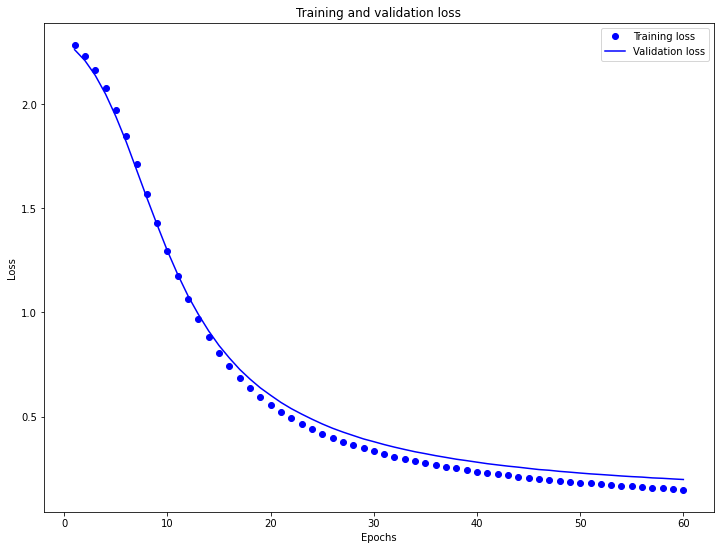

<Figure size 432x288 with 0 Axes>

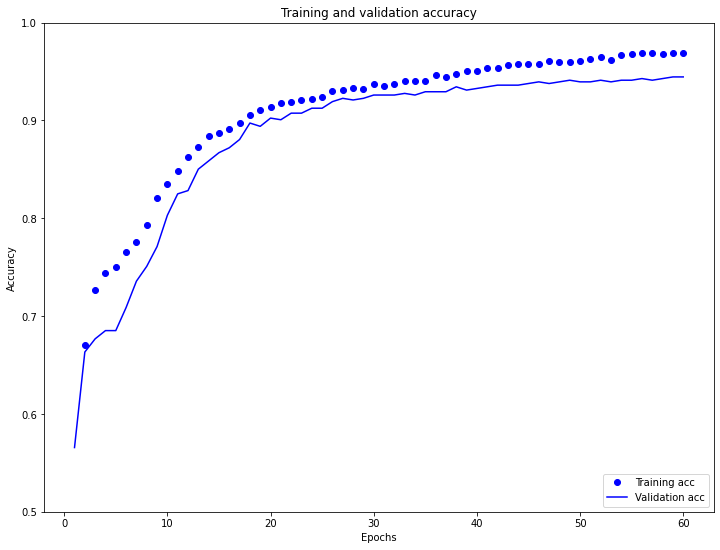

In [45]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# clear previous figure

plt.clf()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

Our model is **overfitting** the data because training accuracy is higher than test (validation) accuracy. The visualization is very useful because we can see where the training and validation (or test) accuracy converge or diverge. To be able to generalize our model so that it works with new data, we want the training and test accuracy to be as closely aligned as possible.

Earlier, we calculated test accuracy from the history of training. Now, let's use the **evaluate()** method to do the same:

In [46]:
test_loss, test_acc = model.evaluate(test_ds)

print('\nTest accuracy:', test_acc)

10/10 [==============================] - 0s 2ms/step - loss: 0.1976 - accuracy: 0.9444

Test accuracy: 0.9444444179534912


# Predictions

We can also make predictions by using the **predict()** method on the test data: 


In [47]:
predictions = model.predict(test_ds)

The **predictions** variable holds all of the predictions based on the **test_ds**. Each prediction is represented by an array of values that  provide a set of probabilities based on the predict method. Let's look at the first prediction (at index 0):

In [48]:
predictions[0]  # start at index 0 to predict 1st image from the test dataset

array([5.4898460e-06, 4.1426331e-04, 9.9464560e-01, 3.5430170e-03,
       2.3784521e-07, 5.4798678e-05, 1.4729109e-06, 2.6393274e-04,
       9.9841738e-04, 7.2799943e-05], dtype=float32)

It's difficult to identify the prediction from the float numbers, so let's make it easier to see:

In [49]:
predictions[0].round(2)

array([0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
      dtype=float32)

So, we know from from the array that the prediction is digit '2' because the '0.99' is located at the third position! Remember that we are predicting digits 0-9. That is, digit '0' is at the first position, digit '1' is at the second position, digit '2' is at the third position and so on.

We use the following algorithm to elicit the confidence in the prediction:

In [50]:
import numpy as np

confidence = 100*np.max(predictions[0])
print (str(np.round(confidence, 2)) + '%')

99.46%


The following algorithm formally predicts the digit based on the first image in the test dataset:

In [51]:
first_pred = np.argmax(predictions[0]) # start at index 0
print ('predicted:', first_pred)

predicted: 2


So, we predict that the digit is **2** based on the first image in the test dataset. Were we correct? We can find out by displaying the first image from the target data:

In [52]:
print ('actual:', y_test[0])

actual: 2


We just verified that our prediction was correct. Now, let's make predictions based on the first five images in our test dataset. We begin by displaying the first five predictions. We continue by displaying the confidence we have in each prediction:

In [53]:
# first five predictions based on test data:

print ('first five preditions:', end=' ')

p5 = []
for i in range(5):
  p = predictions[i]
  v = np.max(p)
  p5.append(p.tolist().index(v))

print (p5)  

# confidence in first five predictions:

print ()
print ('Confidence in our predictions:', br)

c = []
for i in range(5):
  conf = str(round(100*np.max(predictions[i]), 2))
  c.append(conf)  
  print (conf + '% for prediction:', p5[i])


first five preditions: [2, 8, 2, 6, 6]

Confidence in our predictions: 

99.46% for prediction: 2
92.11% for prediction: 8
99.8% for prediction: 2
98.66% for prediction: 6
98.04% for prediction: 6


We continue by comparing our predictions with the actual target values. We also display the confidence we have with each prediction and the actual target images:

predicted: 2
actual: 2
99.46%


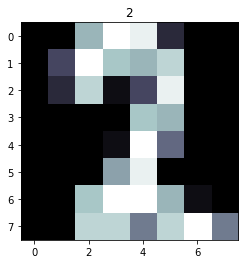



predicted: 8
actual: 8
92.11%


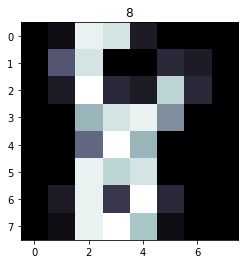



predicted: 2
actual: 2
99.8%


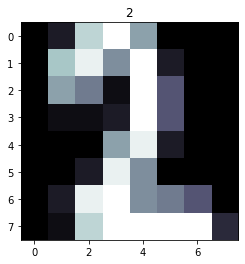



predicted: 6
actual: 6
98.66%


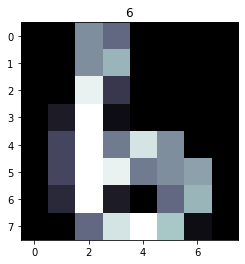



predicted: 6
actual: 6
98.04%


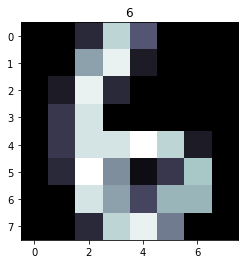

In [54]:
# first five predictions from test data

prediction_5 = [np.argmax(predictions[i])\
                for i, row in enumerate(p5)]

# display predicted digits, actual digits, confidences and images

for i, row in enumerate(prediction_5):
  print ('predicted:', target_names[row])
  print ('actual:', target_names[y_test[i]])
  print (str(c[i]) + '%')
  fig, ax = plt.subplots()
  image = ax.imshow(X_test[i], cmap='bone')
  plt.title(target_names[y_test[i]])
  plt.show()
  print (br)

# Get an Image

To get an image for this book, just follow these simple steps:
1.	go to the GitHub URL for this book: https://github.com/paperd/tensorflow
2.	locate the image you want to download and click on it
3.	click the Download button
4.	right click anywhere inside the image
5.	click Save image as ...
6.	save the image on your computer
7.	drag and drop the image to your Google Drive Colab Notebooks folder

For this lesson, go to the book URL, click **chapter2**, click **figures**, click **Figure0201.png**, click the **Download** button, right click inside the image, click **Save image as ...**, and save the image on your computer. Drag and drop the image to your Google Drive **Colab Notebooks** folder.



# Mount Google Drive to Display an Image

Now, we will show you how to display an image in Google Colab:

1. install Pillow module
2. mount the Google Drive
3. point to the image

In [55]:
!pip install Pillow

To mount the drive, click on the link, go to your google account, copy the authorization code, paste it, and click 'Enter':

In [56]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Point to the image and display it. The image is included on our GitHub site for the book. But, you can use any image you wish. Be sure to copy the image to the directory on your **Google Drive** account that is assigned to the variable **img_path** in the following code snippet:

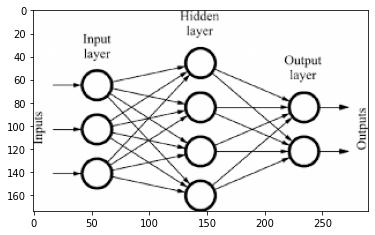

In [58]:
# Be sure to copy the image to this directory on Google Drive
img_path = 'gdrive/My Drive/Colab Notebooks/Figure0201.png'

from PIL import Image
import matplotlib.pyplot as plt
img  = Image.open(img_path)
plt.imshow(img)